In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
diabetes_df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
diabetes_df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [3]:
#finding out number of duplicates
duplicate_values = diabetes_df.duplicated().sum()
print(duplicate_values)
print(len(diabetes_df))

24206
253680


In [4]:
#removing duplicates
diabetes_df.drop_duplicates(inplace = True)
len(diabetes_df)

229474

In [5]:
#finding income range of aveage diabetes sufferer versus average non-diabetes sufferer
mean = diabetes_df.groupby("Diabetes_binary")["Income"].mean()
mean

Diabetes_binary
0.0    6.013705
1.0    5.195829
Name: Income, dtype: float64

In [6]:
#finding likelihood that a member of the surveyed population suffers from diabetes based on income range
mean2 = diabetes_df.groupby("Income")["Diabetes_binary"].mean()
mean2

Income
1.0    0.243387
2.0    0.262504
3.0    0.223869
4.0    0.202827
5.0    0.177249
6.0    0.150471
7.0    0.130224
8.0    0.098297
Name: Diabetes_binary, dtype: float64

In [7]:
diabetes_income = diabetes_df[["Diabetes_binary", "Income"]]

In [8]:

#set range for income
bins = [0,1.0,2.0,3.0,4.0,5.0,6.0, 7.0, 8.0]
#name the ranges
group_names=['<10k','<15k','<20k','<25k', '<35k', '<50k', '<75k', '75k+']
#new column
diabetes_income['Income']=pd.cut(diabetes_income['Income'],bins,labels=group_names)

diabetes_income.head(10)

C:\Users\rohan\AppData\Local\Temp\ipykernel_18000\587289692.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_income['Income']=pd.cut(diabetes_income['Income'],bins,labels=group_names)


,Diabetes_binary,Income
0,0.0,<20k
1,0.0,<10k
2,0.0,75k+
3,0.0,<50k
4,0.0,<25k
5,0.0,75k+
6,0.0,<75k
7,0.0,<25k
8,1.0,<10k
9,0.0,<20k


In [9]:
df_2 = diabetes_income.groupby("Income").mean()

In [10]:
df_2

,Diabetes_binary
Income,
<10k,0.243387
<15k,0.262504
<20k,0.223869
<25k,0.202827
<35k,0.177249
<50k,0.150471
<75k,0.130224
75k+,0.098297


Text(0.5, 1.0, 'Percentage of dataset that has diabetes by income level')

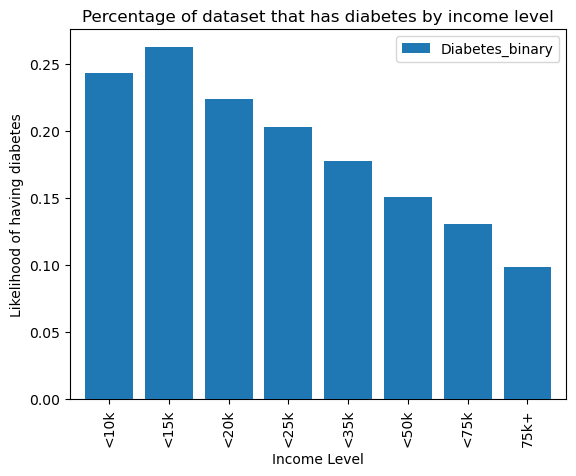

In [11]:
pd_bar = df_2.plot.bar(width=0.8, zorder=3)
pd_bar.set_xlabel("Income Level")
pd_bar.set_ylabel("Likelihood of having diabetes")
pd_bar.set_title("Percentage of dataset that has diabetes by income level")


In [12]:
df_3 = diabetes_df[["Diabetes_binary", "Education"]]
df_3.head()

,Diabetes_binary,Education
0,0.0,4.0
1,0.0,6.0
2,0.0,4.0
3,0.0,3.0
4,0.0,5.0


In [13]:
#set range for education
bins = [0,1.0,2.0,3.0,4.0,5.0,6.0]
#name the ranges
group_names=['No School','Elementary School','Some High School','High School Graduate', 'Some College or Technical Scl', 'College Graduate']
#new column
df_3['Education']=pd.cut(df_3['Education'],bins,labels=group_names)

df_3.head(10)

C:\Users\rohan\AppData\Local\Temp\ipykernel_18000\3884548712.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['Education']=pd.cut(df_3['Education'],bins,labels=group_names)


,Diabetes_binary,Education
0,0.0,High School Graduate
1,0.0,College Graduate
2,0.0,High School Graduate
3,0.0,Some High School
4,0.0,Some College or Technical Scl
5,0.0,College Graduate
6,0.0,College Graduate
7,0.0,High School Graduate
8,1.0,Some College or Technical Scl
9,0.0,High School Graduate


In [14]:
education_diabetes = df_3.groupby("Education").mean()
education_diabetes

,Diabetes_binary
Education,
No School,0.270115
Elementary School,0.292822
Some High School,0.242527
High School Graduate,0.180486
Some College or Technical Scl,0.155183
College Graduate,0.115931


Text(0.5, 1.0, 'Percentage of dataset that has diabetes by education level')

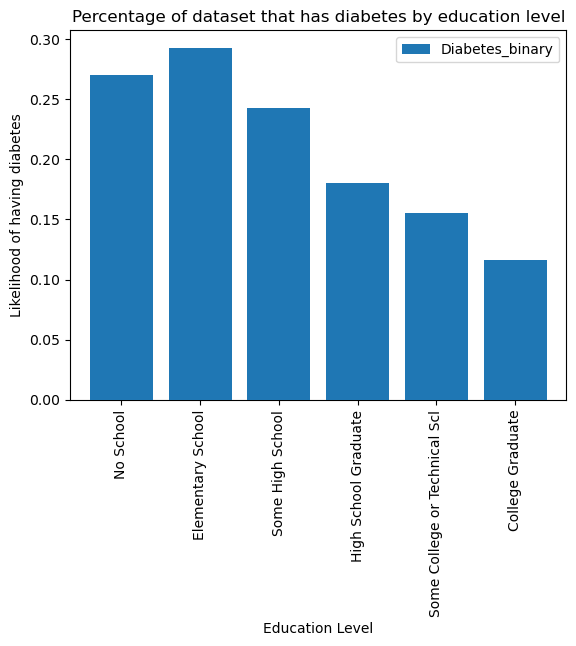

In [15]:
pd_bar = education_diabetes.plot.bar(width=0.8, zorder=3)
pd_bar.set_xlabel("Education Level")
pd_bar.set_ylabel("Likelihood of having diabetes")
pd_bar.set_title("Percentage of dataset that has diabetes by education level")


In [16]:
fruits_veg_df = diabetes_df[["Diabetes_binary", "Fruits", "Veggies"]]
fruits_veg_df

,Diabetes_binary,Fruits,Veggies
0,0.0,0.0,1.0
1,0.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,1.0
4,0.0,1.0,1.0
...,...,...,...
253675,0.0,1.0,1.0
253676,1.0,0.0,0.0
253677,0.0,1.0,0.0
253678,0.0,1.0,1.0


In [19]:
fruits_veg_df['Health rating'] = fruits_veg_df["Fruits"] + fruits_veg_df["Veggies"]
fruits_veg_df

C:\Users\rohan\AppData\Local\Temp\ipykernel_18000\3555114143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fruits_veg_df['Health rating'] = fruits_veg_df["Fruits"] + fruits_veg_df["Veggies"]


,Diabetes_binary,Fruits,Veggies,Health rating
0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,2.0
4,0.0,1.0,1.0,2.0
...,...,...,...,...
253675,0.0,1.0,1.0,2.0
253676,1.0,0.0,0.0,0.0
253677,0.0,1.0,0.0,1.0
253678,0.0,1.0,1.0,2.0


In [33]:
#we are looking at the diabetes rate of the respondents who ate both fruit and vegetables, verses those who ate neither.
new_df = fruits_veg_df.loc[fruits_veg_df["Health rating"] != 1.0]
new_df2 = new_df[["Diabetes_binary", "Health rating"]]
new_df2



,Diabetes_binary,Health rating
1,0.0,0.0
3,0.0,2.0
4,0.0,2.0
5,0.0,2.0
6,0.0,0.0
...,...,...
253672,0.0,2.0
253673,0.0,2.0
253675,0.0,2.0
253676,1.0,0.0


In [34]:
health_mean = new_df2.groupby("Health rating").mean()
health_mean

,Diabetes_binary
Health rating,
0.0,0.180266
2.0,0.139968


Text(0.5, 1.0, 'Percentage of dataset that has diabetes by diet habits')

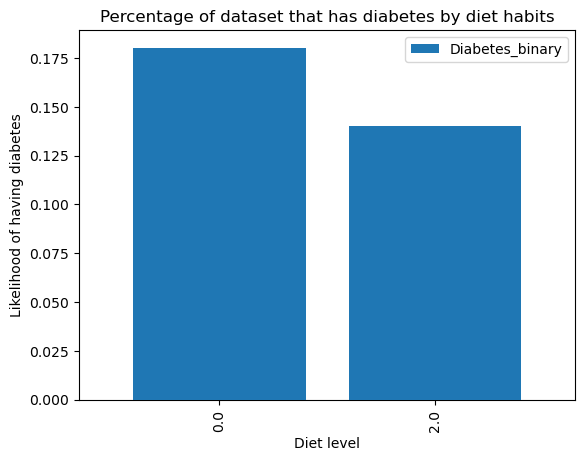

In [35]:
pd_bar = health_mean.plot.bar(width=0.8, zorder=3)
pd_bar.set_xlabel("Diet level")
pd_bar.set_ylabel("Likelihood of having diabetes")
pd_bar.set_title("Percentage of dataset that has diabetes by diet habits")